### Week 5 & 6
### DSC 640
### Abed Tabbalat
### Python

In [1]:
# Library Imports
import pandas as pd
import numpy as np
import seaborn as sns
import squarify
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

In [2]:
# Settings
pd.set_option("display.max_rows", 10, "display.max_columns", 10)
plt.style.use('seaborn')
sns.set_style('whitegrid')

In [3]:
# Data import
dfu = pd.read_csv('unemployement-rate-1948-2010.csv')
dfu

,Series id,Year,Period,Value
0,LNS14000000,1948,M01,3.4
1,LNS14000000,1948,M02,3.8
2,LNS14000000,1948,M03,4.0
3,LNS14000000,1948,M04,3.9
4,LNS14000000,1948,M05,3.5
...,...,...,...,...
741,LNS14000000,2009,M10,10.1
742,LNS14000000,2009,M11,10.0
743,LNS14000000,2009,M12,10.0
744,LNS14000000,2010,M01,9.7


In [4]:
dfu.dtypes

Series id     object
Year           int64
Period        object
Value        float64
dtype: object

In [5]:
dfe = pd.read_csv('expenditures.txt', sep='\t')
dfe

,year,category,expenditure,sex
0,2008,Food,6443,1
1,2008,Alcoholic Beverages,444,1
2,2008,Housing,17109,1
3,2008,Apparel,1801,1
4,2008,Transportation,8604,1
...,...,...,...,...
345,1984,Education,303,1
346,1984,Tobacco Products,228,1
347,1984,Miscellaneous,451,1
348,1984,Cash Contributions,706,1


In [6]:
dfe.describe()

,year,expenditure,sex
count,350.000000,350.000000,350.0
mean,1996.000000,2482.674286,1.0
std,7.221426,3176.732830,0.0
min,1984.000000,116.000000,1.0
25%,1990.000000,401.500000,1.0
50%,1996.000000,1225.500000,1.0
75%,2002.000000,3039.000000,1.0
max,2008.000000,17109.000000,1.0


### Applying Charts

#### Treemap Chart

In [7]:
# Top 5 expenditure categories
dfe_top5 = dfe.groupby('category')['expenditure'].sum().nlargest(5)
dfe_top5

category
Housing               280256
Transportation        160694
Food                  119297
Personal Insurance     84269
Healthcare             47383
Name: expenditure, dtype: int64

(0.0, 100.0, 0.0, 100.0)

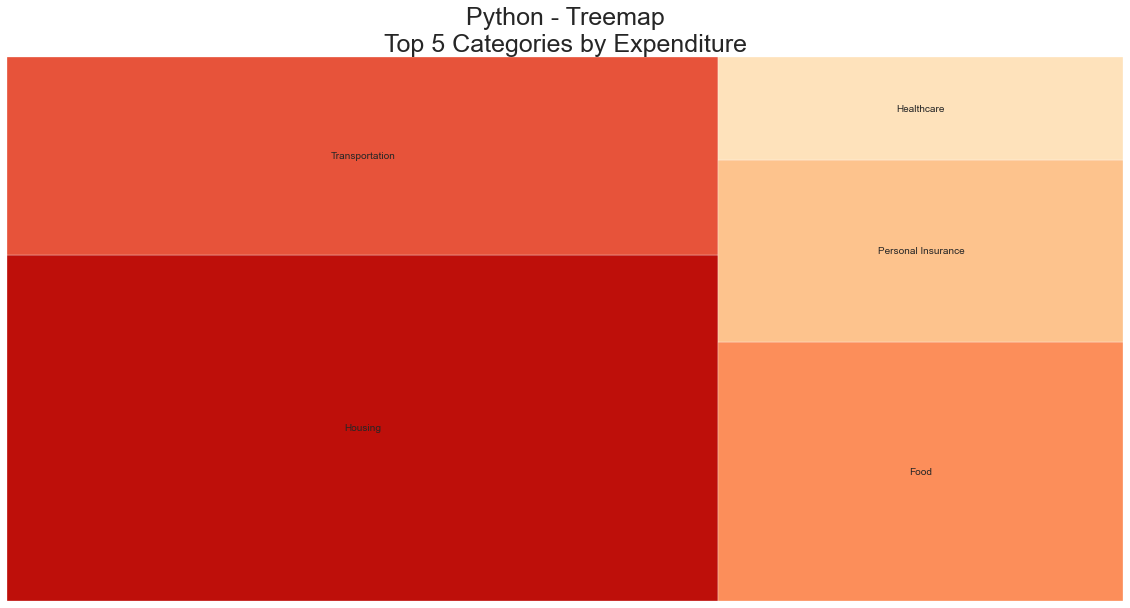

In [8]:
fig, ax = plt.subplots(figsize=(20, 10))

# Plot
squarify.plot(sizes = dfe_top5.values, label = dfe_top5.index, 
              color = sns.color_palette("OrRd_r", len(dfe_top5.values)))

# Format
plt.title('Python - Treemap\nTop 5 Categories by Expenditure', fontsize=25)
ax.axis('off')

#### Area Chart

In [9]:
# Expenditure per year
dfe_year = dfe.groupby('year')['expenditure'].sum()
dfe_year

year
1984    21972
1985    23489
1986    23865
1987    24415
1988    25893
        ...  
2004    43392
2005    46407
2006    48400
2007    49619
2008    50489
Name: expenditure, Length: 25, dtype: int64

Text(0.5, 1.0, 'Python - Area Chart\nExpenditures By Year')

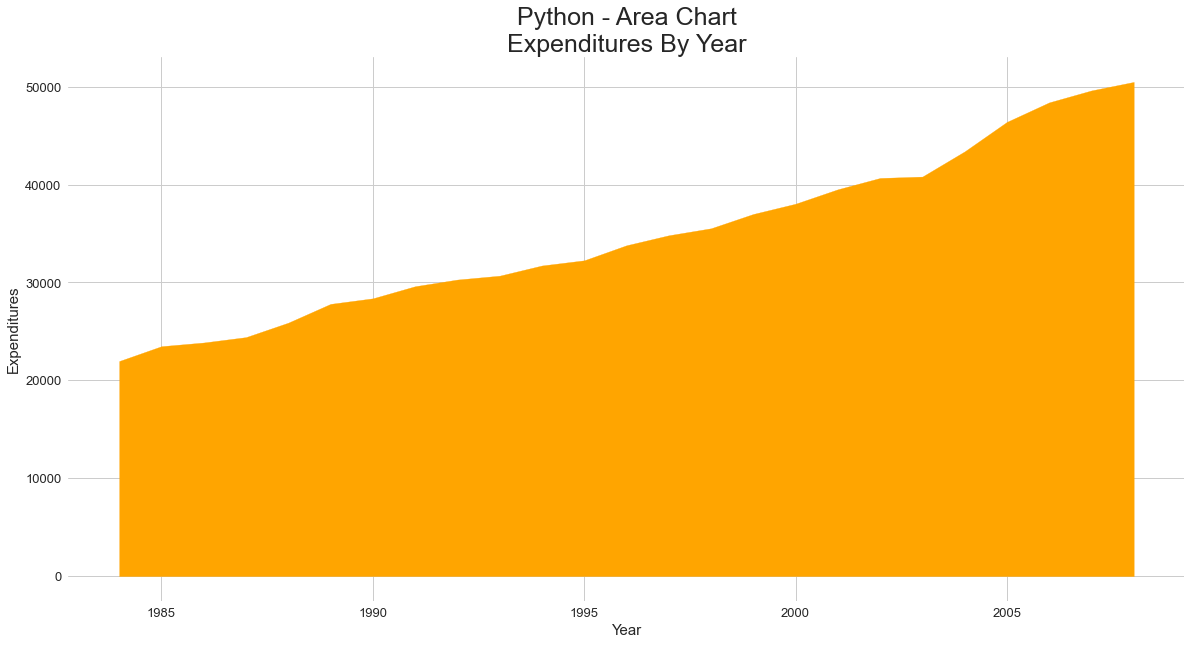

In [10]:
fig, ax = plt.subplots(figsize=(20, 10))

# Plot
ax.fill_between(dfe_year.keys(), dfe_year.values, color='orange')

# Format

plt.xlabel('Year', fontsize=15)
plt.xticks(fontsize=13)
plt.ylabel('Expenditures', fontsize=15)
plt.yticks(fontsize=13)
plt.title('Python - Area Chart\nExpenditures By Year', fontsize=25)

#### Stacked Area Chart

In [11]:
# Creating a 10 year stacked area chart 2009, 1999, 1989
# Y axis variables
fy_2009 = list(dfu[dfu['Year'] == 2009]['Value'])
fy_1999 = list(dfu[dfu['Year'] == 1999]['Value'])
fy_1989 = list(dfu[dfu['Year'] == 1989]['Value'])

y = {
    '2009' : fy_2009,
    '1999' : fy_1999,
    '1989' : fy_1989
}

y

{'2009': [7.7, 8.2, 8.6, 8.9, 9.4, 9.5, 9.4, 9.7, 9.8, 10.1, 10.0, 10.0],
 '1999': [4.3, 4.4, 4.2, 4.3, 4.2, 4.3, 4.3, 4.2, 4.2, 4.1, 4.1, 4.0],
 '1989': [5.4, 5.2, 5.0, 5.2, 5.2, 5.3, 5.2, 5.2, 5.3, 5.3, 5.4, 5.4]}

In [12]:
# X axis variable
x = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']

x

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']

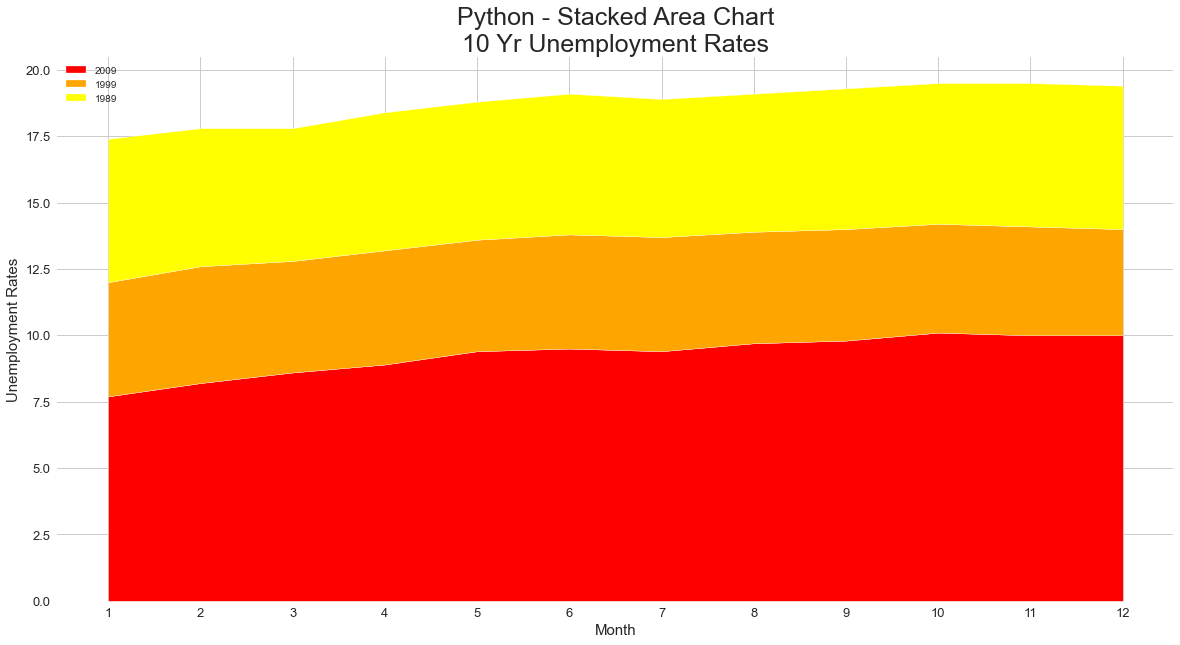

In [13]:
fig, ax = plt.subplots(figsize=(20, 10))

# Plot
ax.stackplot(x, y.values(), labels = y.keys(), colors = ['red', 'orange', 'yellow'])

# Format
plt.xlabel('Month', fontsize=15)
plt.xticks(fontsize=13)
plt.ylabel('Unemployment Rates', fontsize=15)
plt.yticks(fontsize=13)
plt.title('Python - Stacked Area Chart\n10 Yr Unemployment Rates',fontsize=25)


ax.legend(loc = 'upper left')